<a href="https://colab.research.google.com/github/ritwiks9635/CSV_Projects_File/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New

***What was the change in price of the stock overtime?***

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

data = pd.concat(company_list, axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-12,145.759995,148.449997,145.050003,145.860001,144.994202,77588800,APPLE
2022-07-13,142.990005,146.449997,142.119995,145.490005,144.626404,71185600,APPLE
2022-07-14,144.080002,148.949997,143.250000,148.470001,147.588715,78140700,APPLE
2022-07-15,149.779999,150.860001,148.199997,150.169998,149.278625,76259900,APPLE
2022-07-18,150.740005,151.570007,146.699997,147.070007,146.197037,81420900,APPLE


In [7]:
data.shape

(1008, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2022-07-12 to 2023-07-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1008 non-null   float64
 1   High          1008 non-null   float64
 2   Low           1008 non-null   float64
 3   Close         1008 non-null   float64
 4   Adj Close     1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   company_name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,160.099022,162.151924,158.279514,160.297022,159.903876,4.845012e+07
std,69.603826,70.209777,69.089584,69.718617,69.326104,2.801059e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.903179e+06
25%,104.171247,105.910000,103.254997,104.412498,104.412498,2.512328e+07
50%,134.775002,136.650002,132.900002,134.634995,134.264351,4.454310e+07
75%,199.722500,200.962498,197.177494,199.040001,198.639816,6.506058e+07
max,351.320007,351.470001,341.950012,348.100006,348.100006,2.231334e+08


**Closing Price**

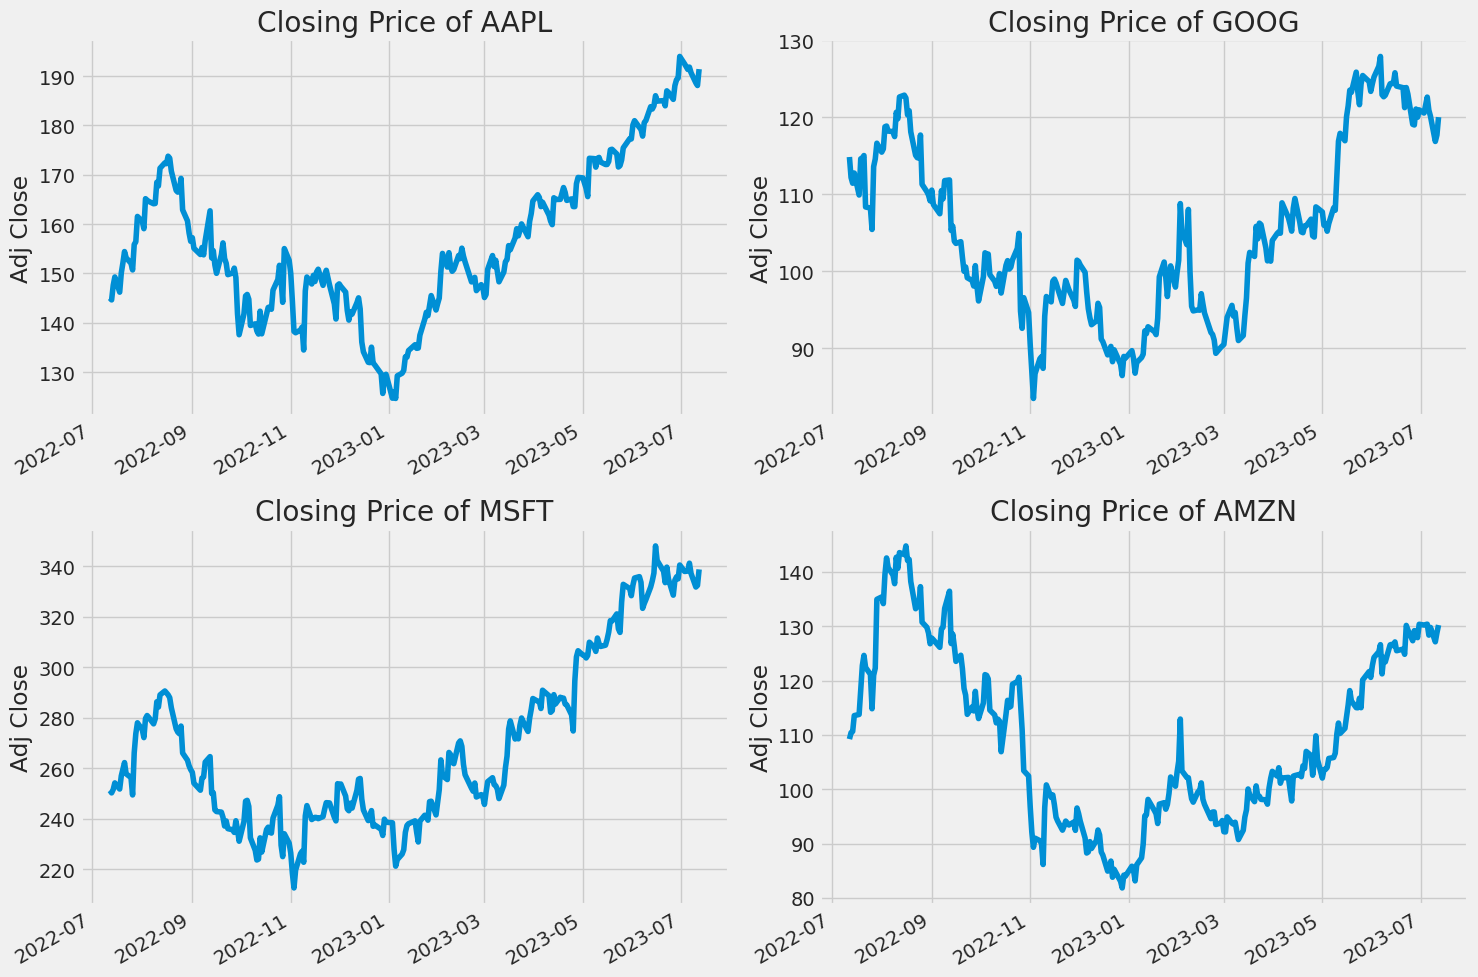

In [35]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

**Volume of Sales**

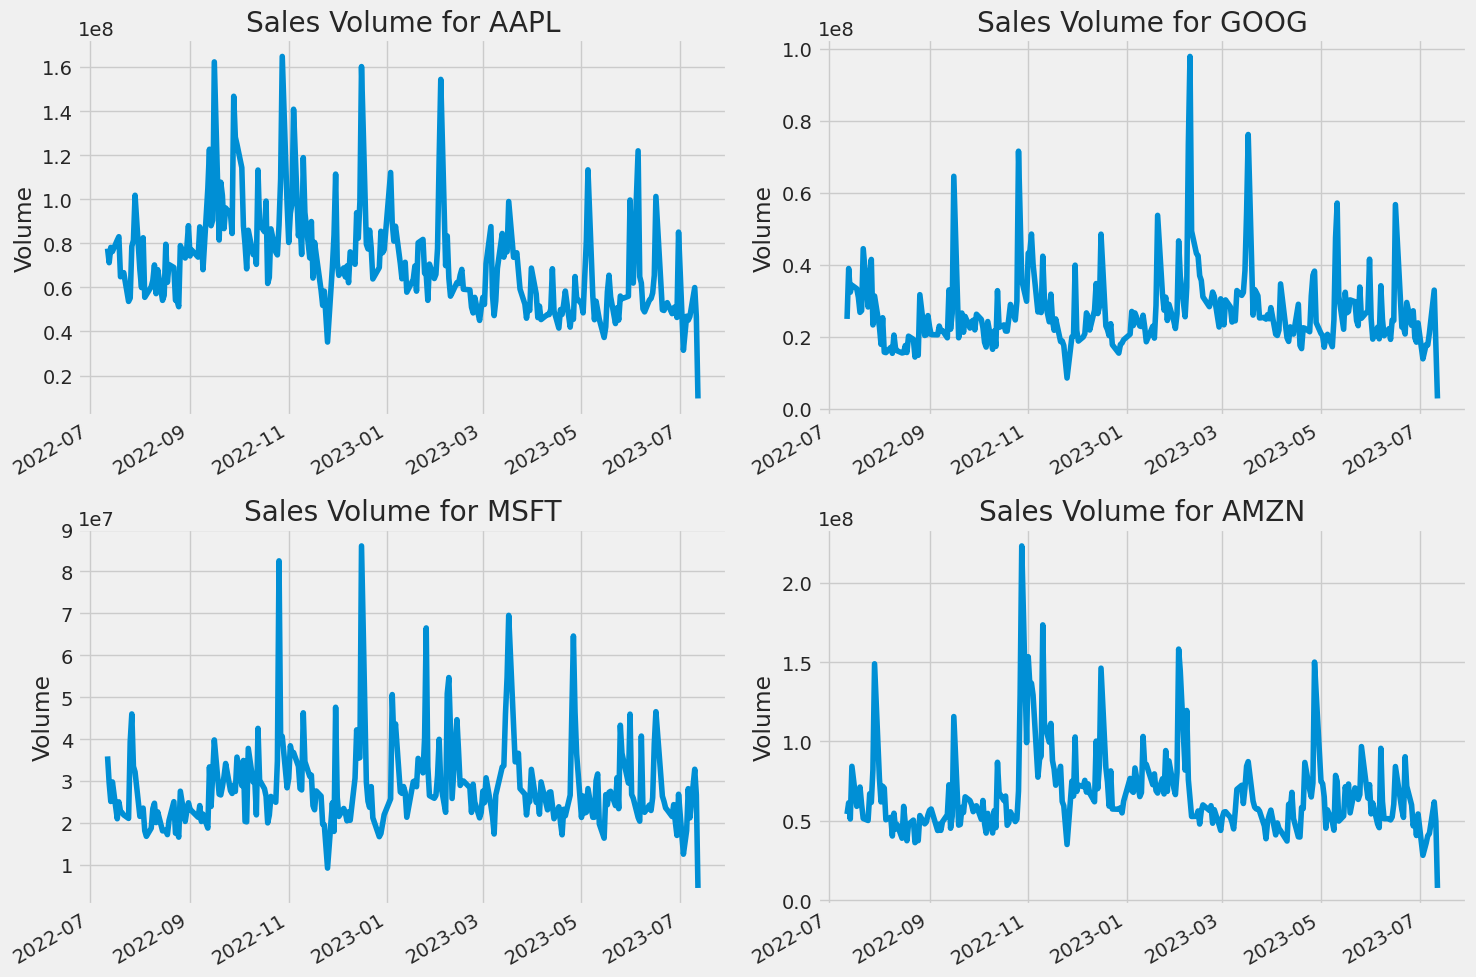

In [37]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):

    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

***What was the moving average of the various stocks?***

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

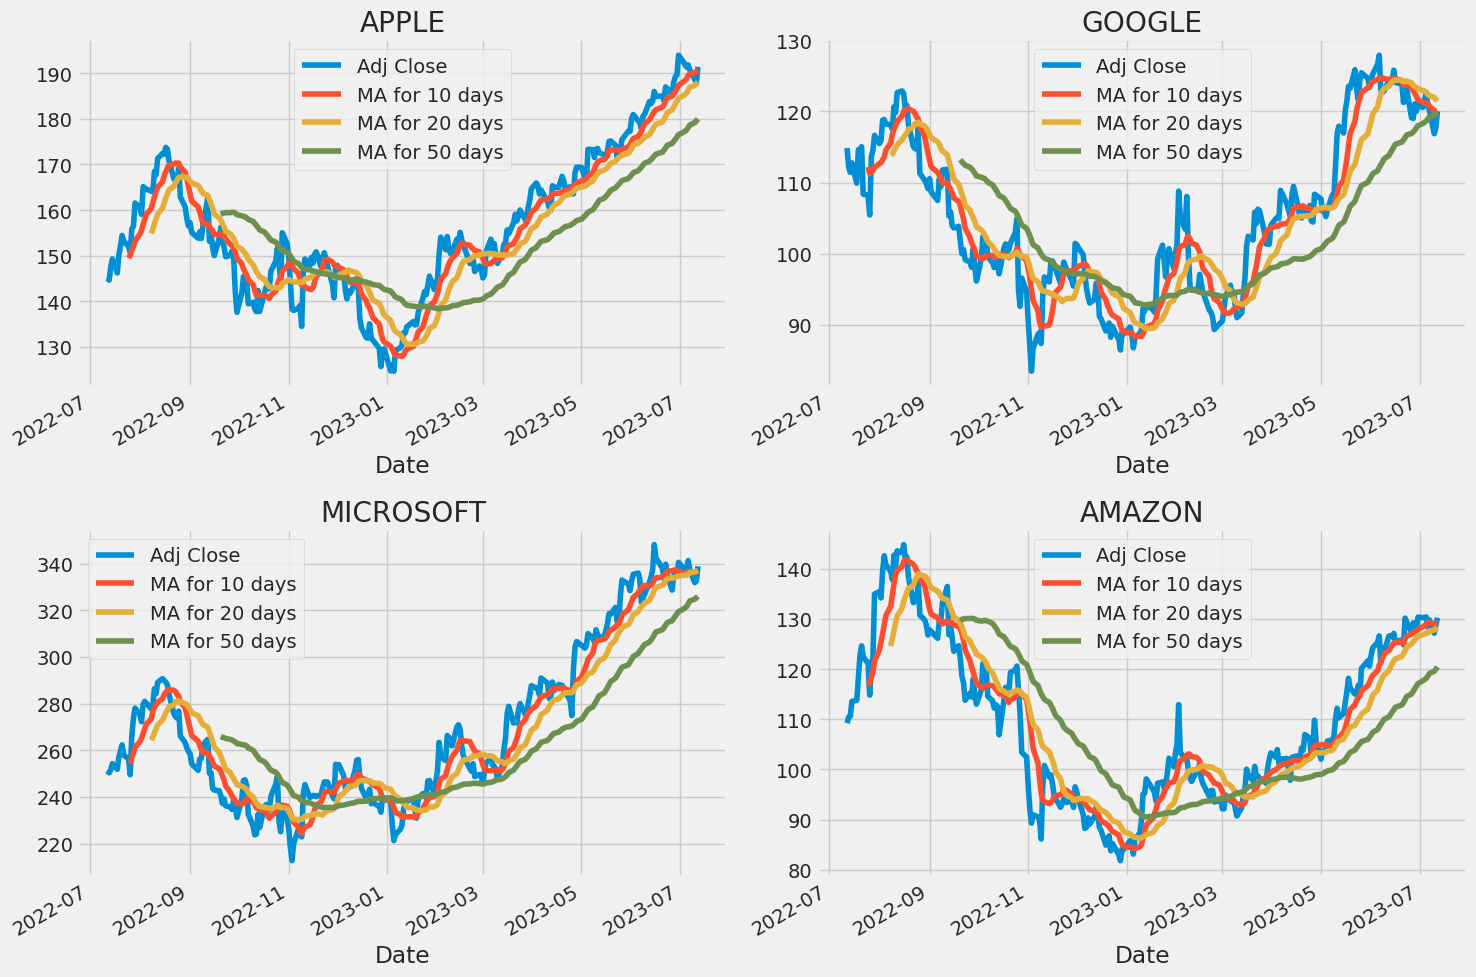

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

***What was the daily return of the stock on average?***

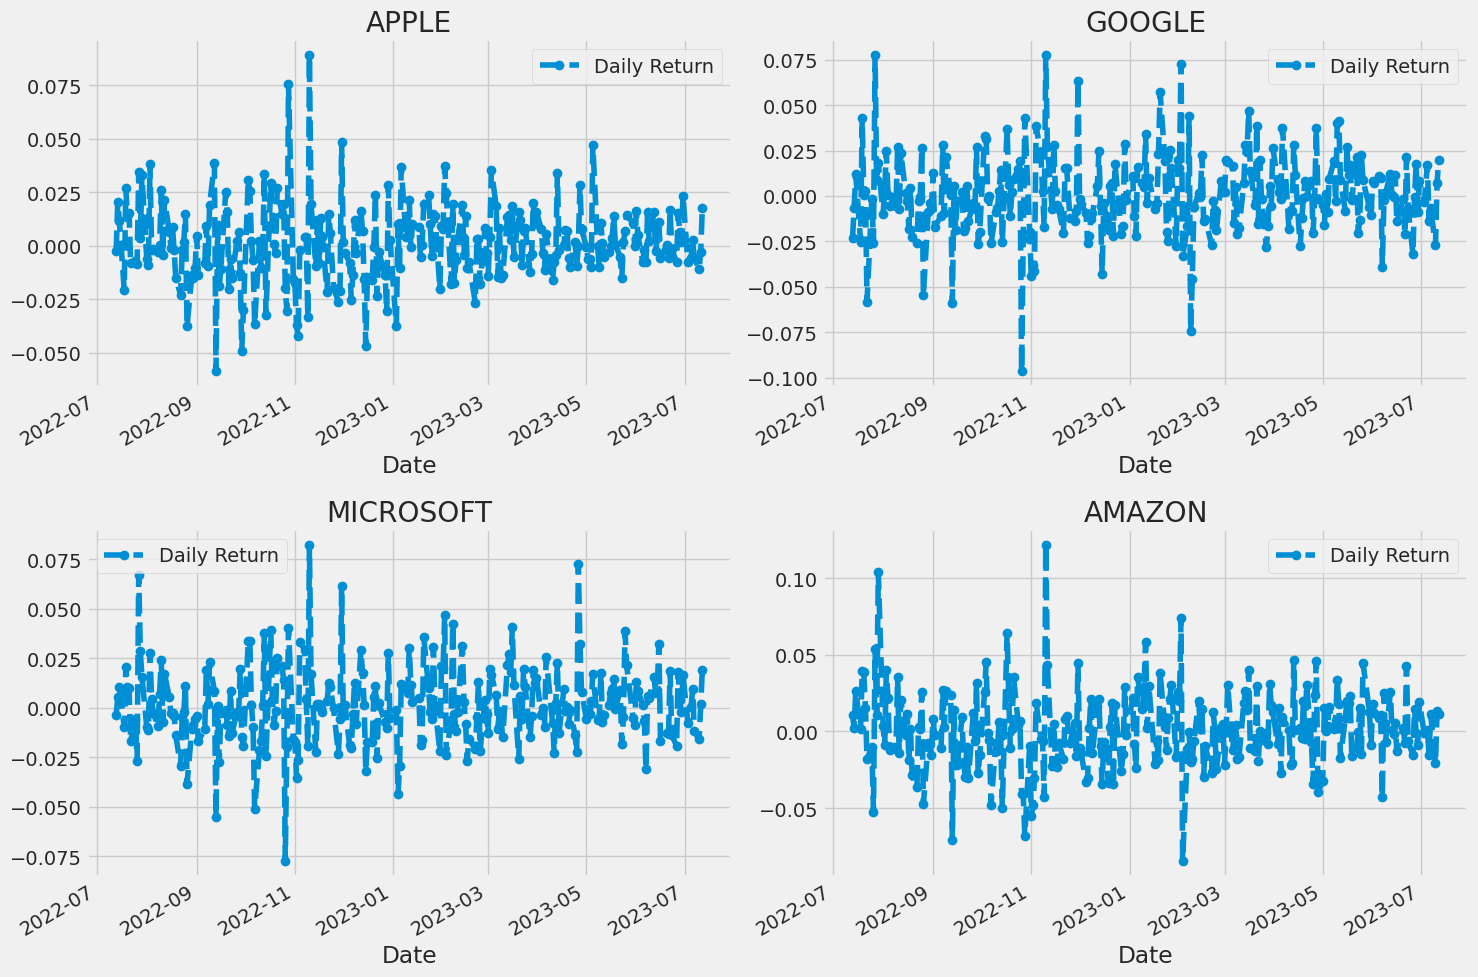

In [14]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

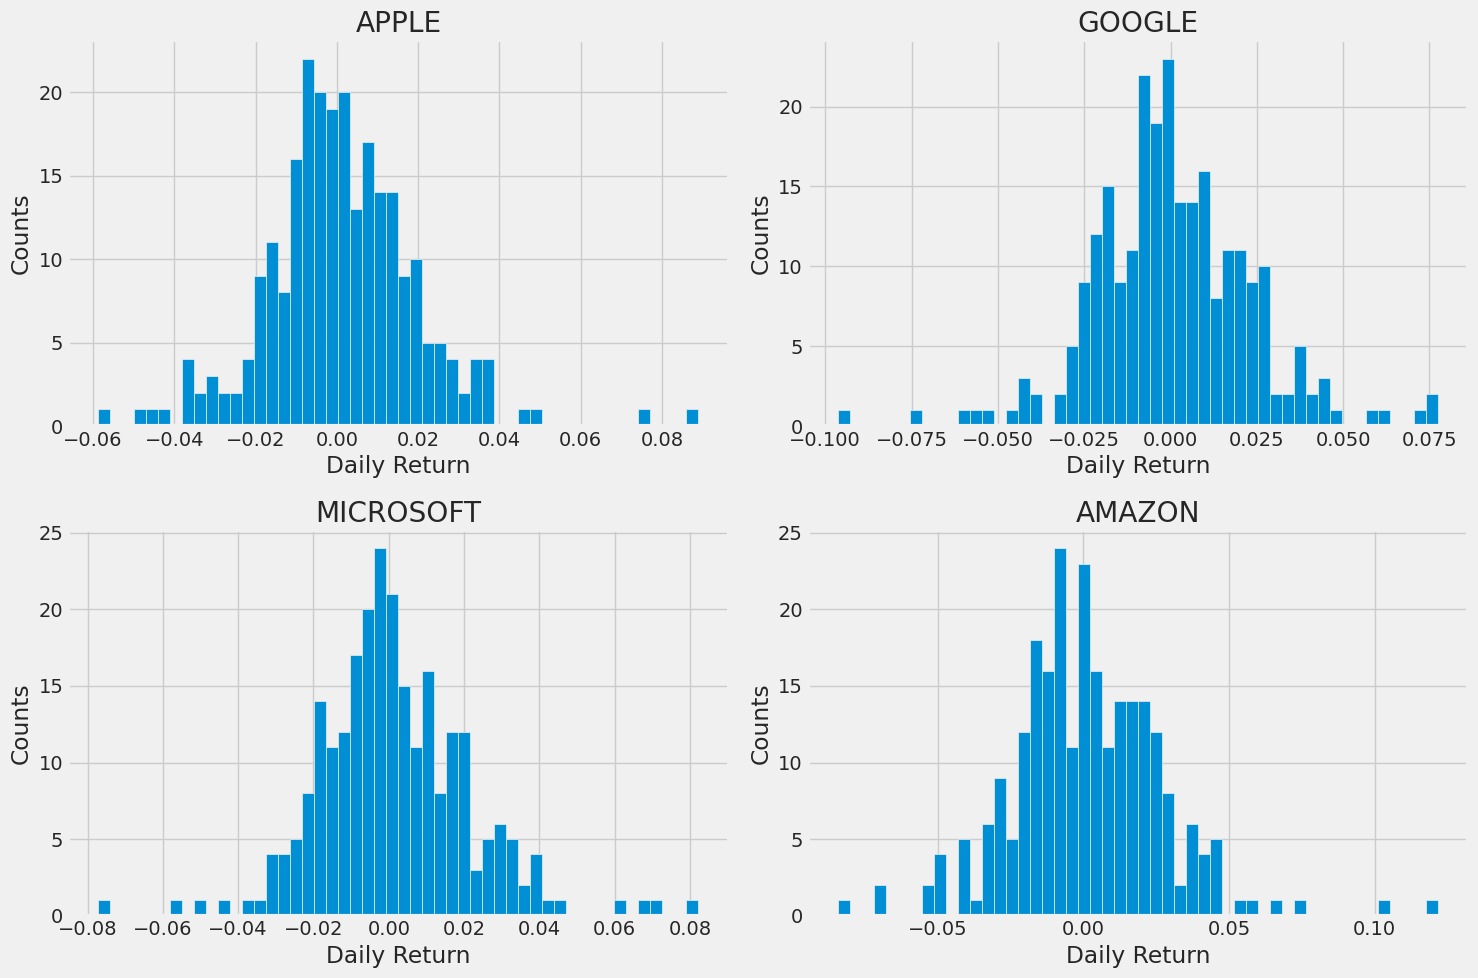

In [15]:
plt.figure(figsize=(15,10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

***What was the correlation between different stocks closing prices?***

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-12,NaN,NaN,NaN,NaN
2022-07-13,-0.002537,0.010804,-0.023183,-0.003745
2022-07-14,0.020483,0.002083,-0.006658,0.005381
2022-07-15,0.011450,0.026394,0.011908,0.010390
2022-07-18,-0.020643,0.001849,-0.025335,-0.009621


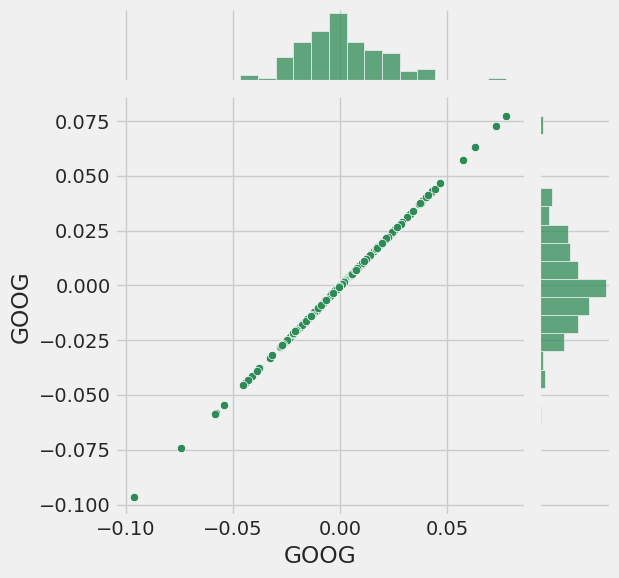

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

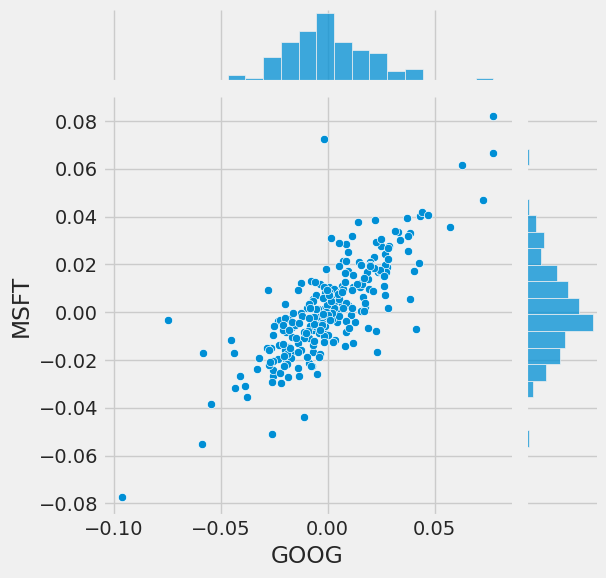

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

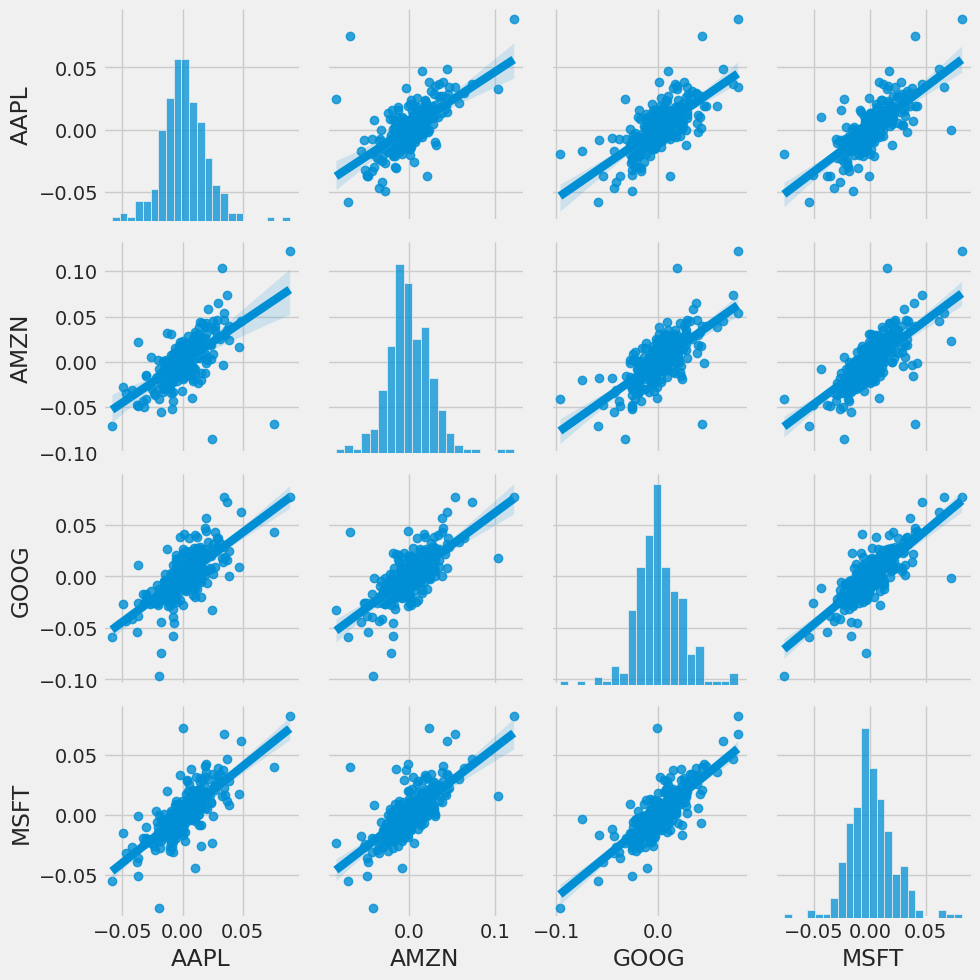

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

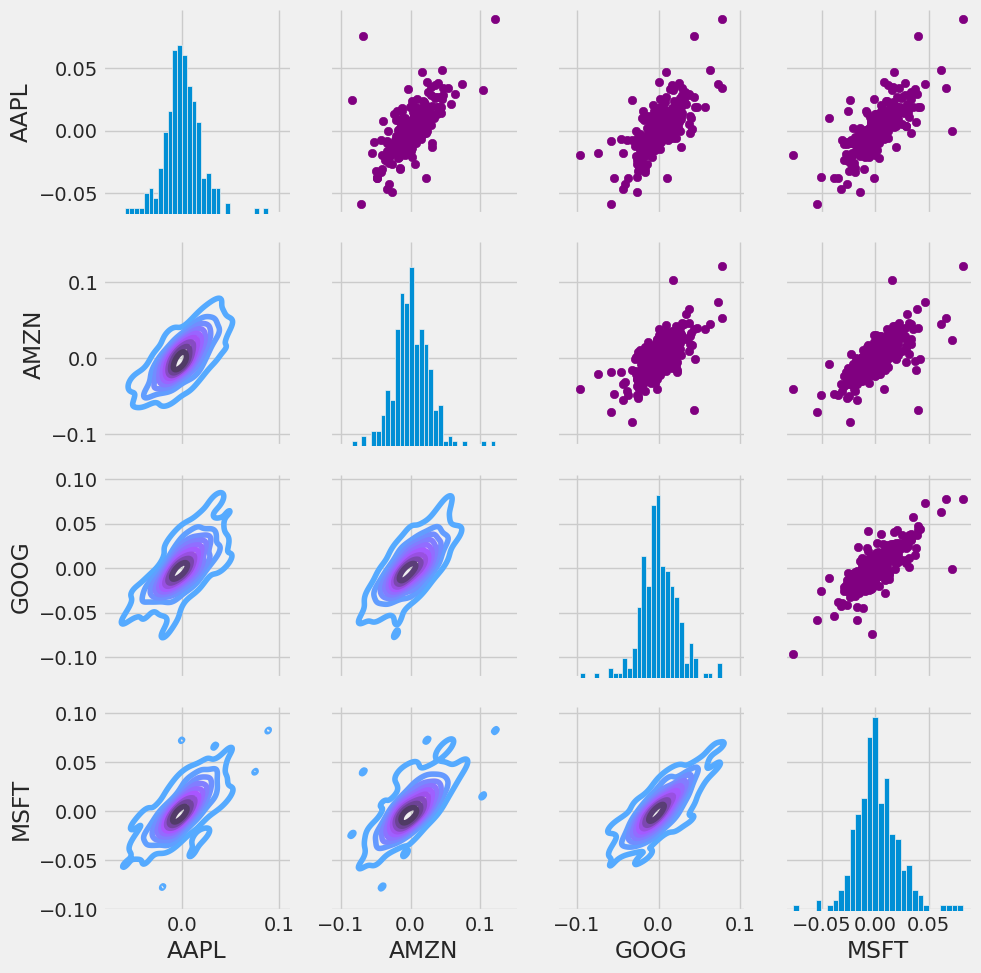

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

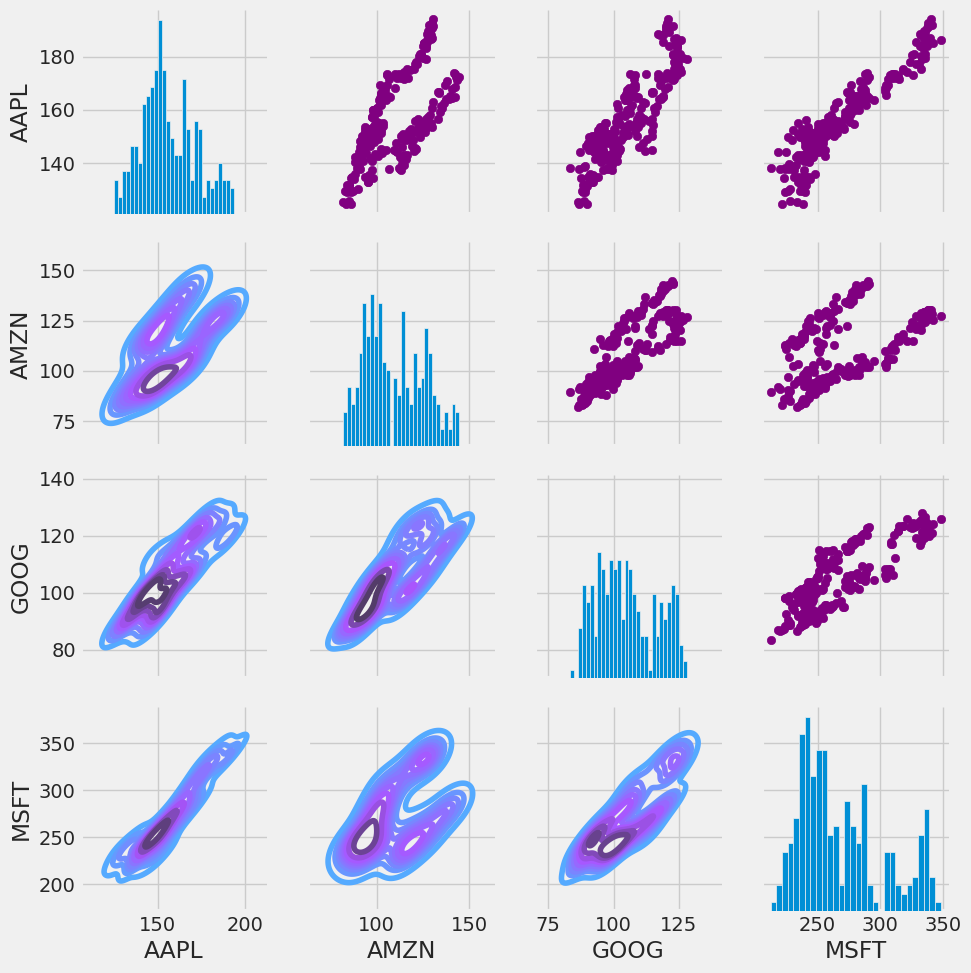

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

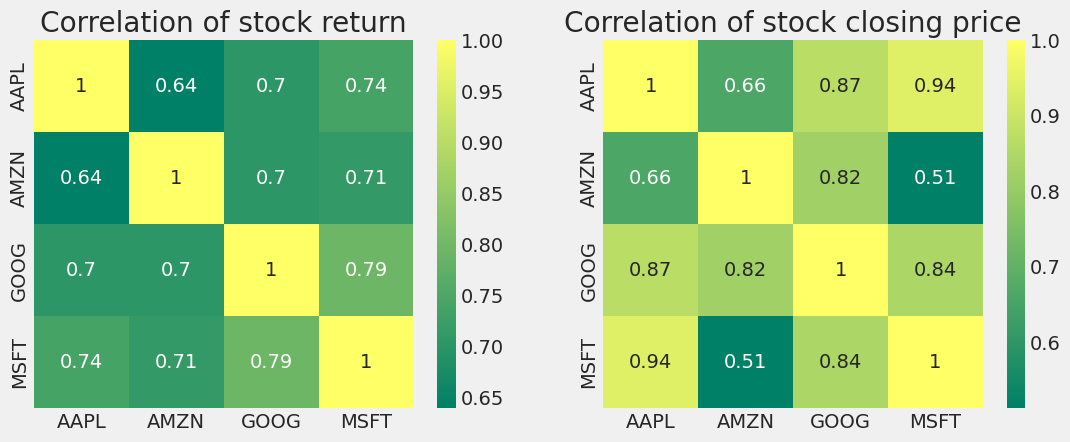

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

***How much value do we put at risk by investing in a particular stock?***

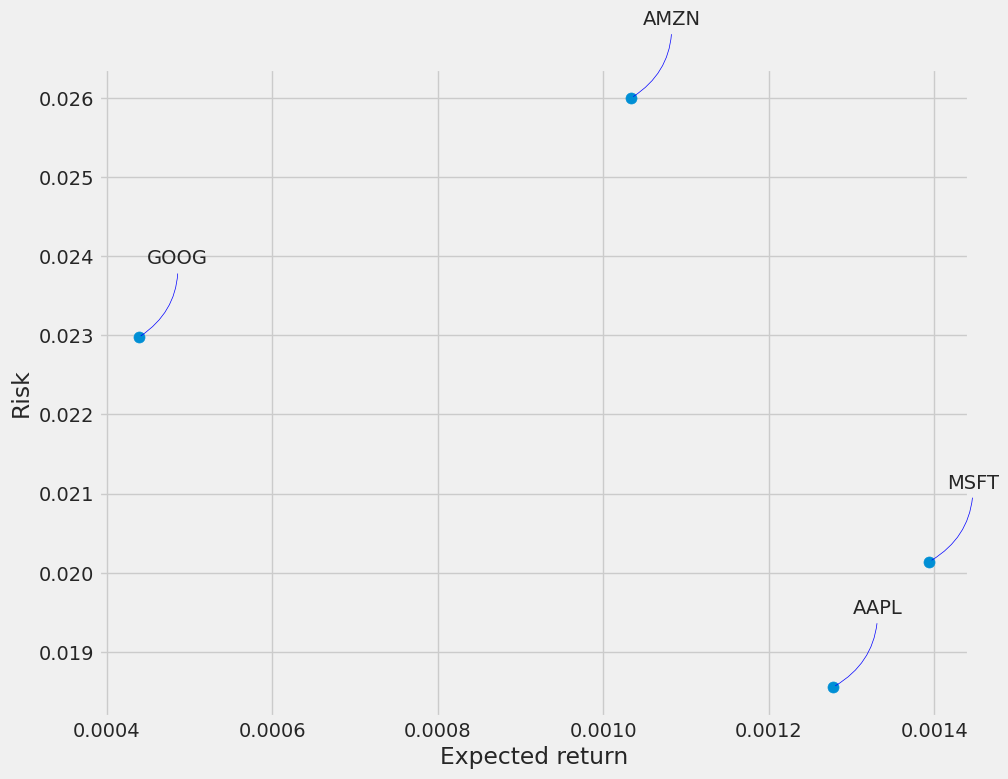

In [23]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

****Predicting the closing price stock price of APPLE inc:****

In [24]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482928,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801659,394024400


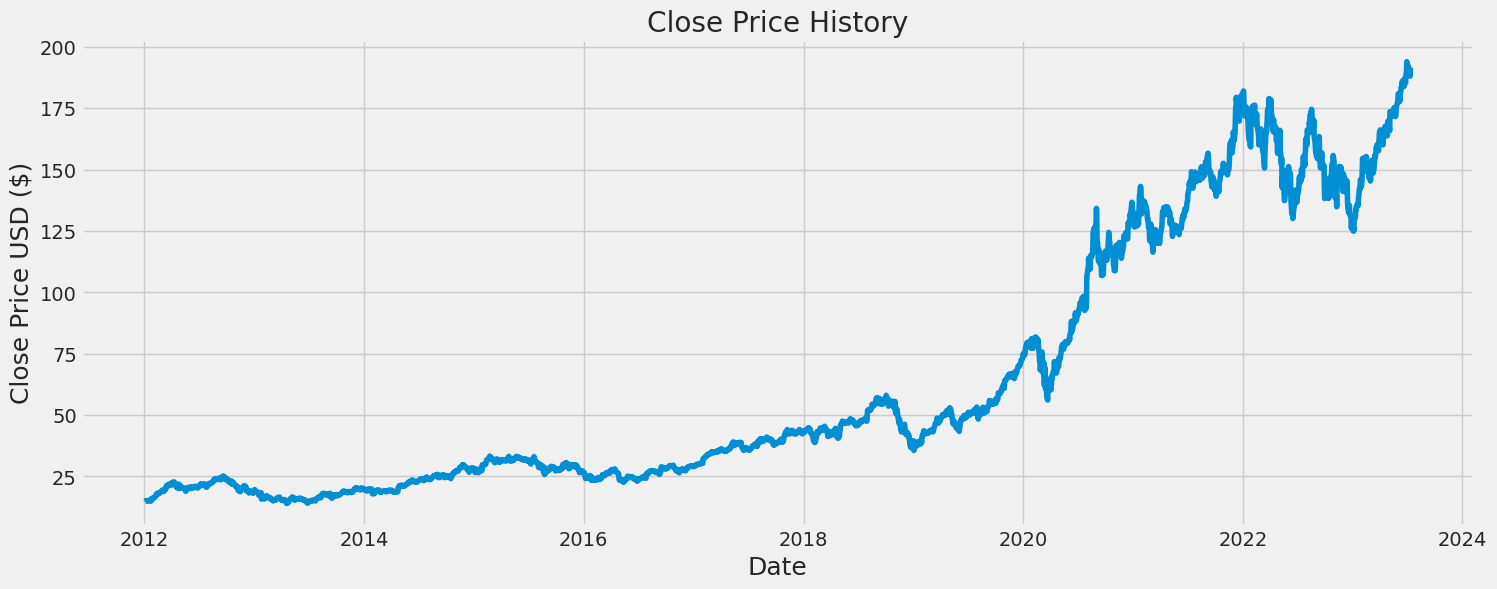

In [25]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [26]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2755

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [0.97022594],
       [0.96728187],
       [0.98621897]])

In [28]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.005906  , 0.00731654, 0.00592783,
       0.01113551, 0.01073279, 0.01125851, 0.01239527, 0.01308368,
       0.01302615, 0.01281387, 0.01371852, 0.0145696 , 0.01553377,
       0.01709112, 0.02036253, 0.02041213, 0.02223333, 0.02359427,
       0.02125528, 0.02215596, 0.02213811, 0.02466359, 0.0243045 ,
       0.0249691 , 0.02616339, 0.026828  , 0.02874244, 0.0301371 ,
       0.03053983, 0.03068069, 0.02829607, 0.02772074, 0.02780605,
       0.03004784, 0.03067871, 0.0320337 , 0.03522774, 0.03948911,
       0.03869159, 0.03869357, 0.04177454, 0.04273871, 0.04205228,
       0.04142538, 0.04077268, 0.04294106, 0.04442897, 0.04505191])]
[0.043512415186967204]

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.0

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2695/2695 [==============================] - 63s 21ms/step - loss: 0.0014


In [30]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 19ms/step


6.5118641559703505

<ipython-input-31-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


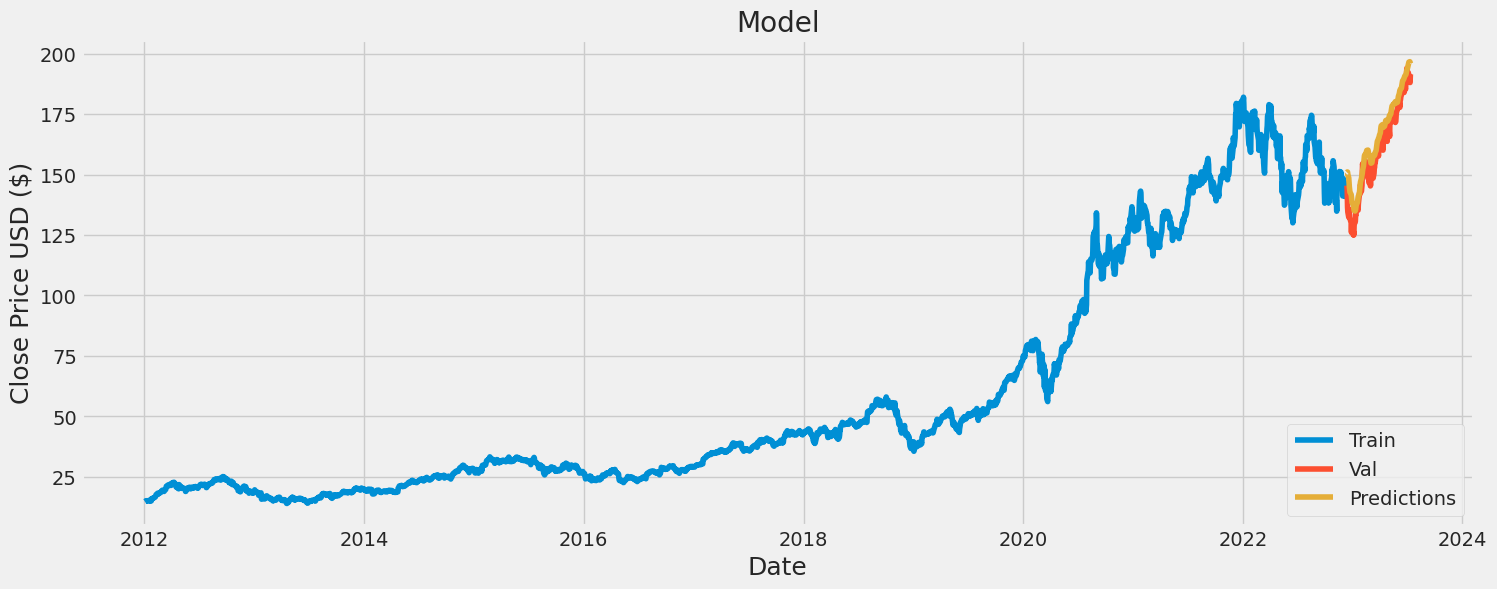

In [31]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-13,145.470001,150.956787
2022-12-14,143.210007,151.077057
2022-12-15,136.500000,151.061630
2022-12-16,134.509995,150.118988
2022-12-19,132.369995,148.625107
...,...,...
2023-07-06,191.809998,196.032562
2023-07-07,190.679993,196.532974
2023-07-10,188.610001,196.715240
